## EN2550 Assignment 1 on Fitting and Alignment

190574U </br> Induwara Senadheera

In [5]:
import numpy as np
import cv2 as cv
from scipy . optimize import minimize
from scipy import linalg
import matplotlib . pyplot as plt
import random

In [3]:
import numpy as np
from scipy . optimize import minimize
from scipy import linalg
import matplotlib.pyplot as plt
# np . random. seed ( 0 )
N = 100
half_n = N//2
r = 10
s = r /16
t = np . random. uniform(0 , 2*np . pi , half_n )
n = s*np . random. randn ( half_n )
x , y = ( r + n)*np . cos ( t ) , ( r + n)*np . sin ( t )
X_circ = np . hstack ( ( x . reshape ( half_n , 1 ) , y . reshape ( half_n , 1 ) ) )
m, b = -1, 2
x = np . linspace (-12, 12 , half_n )
y = m*x + b + s*np . random. randn ( half_n )
X_line = np . hstack ( ( x . reshape ( half_n , 1 ) , y . reshape ( half_n , 1 ) ) )
X = np . vstack ( ( X_circ , X_line ) )





In [4]:
def RANSAC_line(Data_set,s,t,e,p):
    # s = No of points
    # t = Distance for the point from the drawn line to become inlinear
    # e = Outliar ratio
    # p = Success probability
    No_of_iterations=int(np.log(1-p)/np.log(1-(1-e)**s))*100

    max_inlinear_count=0
    best_fit_line_coefficient=[]

    for sample in range(0,No_of_iterations+1):
        point1,point2=random.randint(0,len(Data_set)-1),random.randint(0,len(Data_set)-1)
        #Ya + Xb + C = 0
        #Y(y1-y2)+X(x2-x1)+(x1*y2-y1*x2)=0
        a = Data_set[point1][1]-Data_set[point2][1]
        b = Data_set[point2][0]-Data_set[point1][0]
        c = Data_set[point1][0]*Data_set[point2][1] - Data_set[point1][1]*Data_set[point2][0]

        inlinear_count=0
        for i in range(0,len(Data_set)):
            distance=abs((a*Data_set[i][0] + b*Data_set[i][1]+c)/(np.sqrt(a**2+b**2)))
            if distance<t:
                inlinear_count+=1
        if inlinear_count > max_inlinear_count:
            max_inlinear_count = inlinear_count
            best_fit_line_coefficient = [a,b,c]
    
    plt.figure(figsize=(15,15))
    for data_point in Data_set:
        plt.scatter(data_point[0],data_point[1])
    x_values=np.arange(-15,15+1)
    y_values=-1*(x_values*best_fit_line_coefficient[0]+best_fit_line_coefficient[2])/best_fit_line_coefficient[1]

    plt.plot(x_values,y_values,color="red")
    plt.show()

    print("Number of Samples =",No_of_iterations)
    print("Inlinear Count =",max_inlinear_count)
    

<ipython-input-4-6ec5d73ccbc9>:21: RuntimeWarning: invalid value encountered in double_scalars
  distance=abs((a*Data_set[i][0] + b*Data_set[i][1]+c)/(np.sqrt(a**2+b**2)))


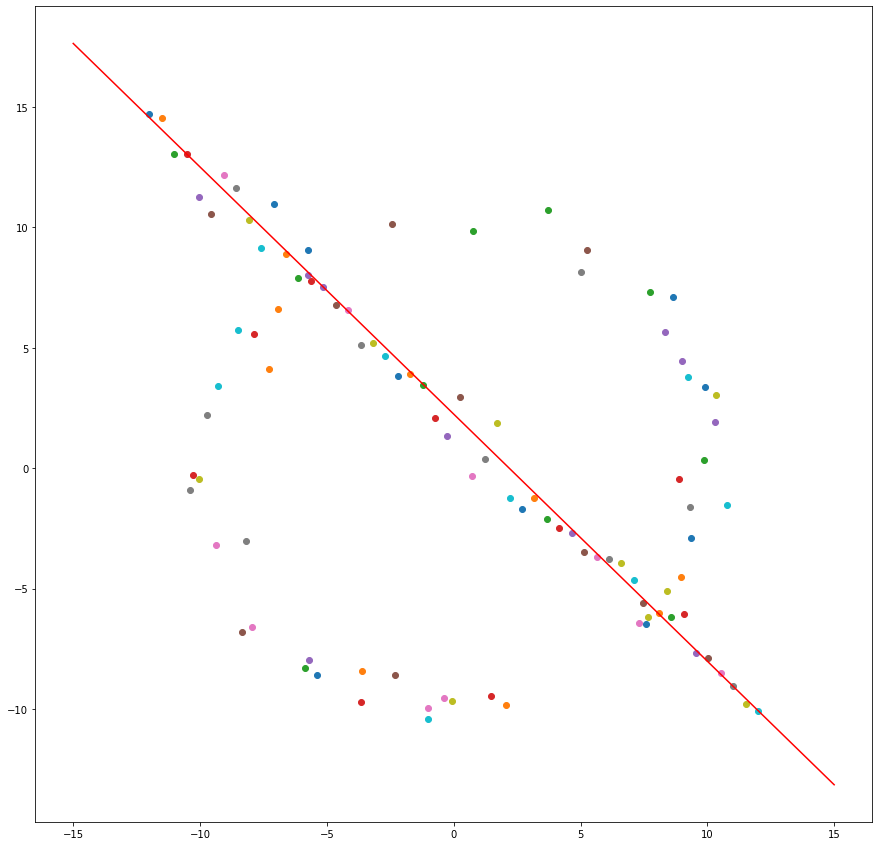

Number of Samples = 600
Inlinear Count = 54


In [5]:
RANSAC_line(X,2,1,0.3,0.99)

In [6]:


def RANSAC_circle(Data_set,No_of_iterations,t):
    max_inlinear_count=0
    best_fit_circle_coefficient=[]
    best_sample_points=[]
    
    for sample in range(0,No_of_iterations+1):
        point1,point2,point3=random.randint(0,len(Data_set)-1),random.randint(0,len(Data_set)-1),random.randint(0,len(Data_set)-1)
        x1,x2,x3=Data_set[point1][0],Data_set[point2][0],Data_set[point3][0]
        y1,y2,y3=Data_set[point1][1],Data_set[point2][1],Data_set[point3][1]

        P = np.array([[2*x1 , 2*y1 , 1] , [2*x2 , 2*y2 , 1] , [2*x3 , 2*y3 , 1]])
        if (np.linalg.det(P)==0):
            continue
        K=np.array([[x1**2 + y1**2] , [x2**2 + y2**2] , [x3**2+y3**2]])*(-1)
        answer=np.linalg.inv(P)@ K
        g,f,c=answer[0][0],answer[1][0],answer[2][0]
        radius=np.sqrt(g**2+f**2-c)
        if radius>20:
            continue
        center=[-g,-f]

        inlinear_count=0
        for i in range(0,len(Data_set)):
            distance=abs(np.sqrt((Data_set[i][0]-center[0])**2 + (Data_set[i][1]-center[1])**2) - radius)
            if distance < t:
                inlinear_count+=1
        if inlinear_count>max_inlinear_count:
            max_inlinear_count=inlinear_count
            best_fit_circle_coefficient=[g,f,c]
            best_sample_points=np.array([Data_set[point1],Data_set[point2],Data_set[point3]])
    return(best_fit_circle_coefficient,best_sample_points,max_inlinear_count)


In [7]:
s=3
t=1
e=0.5
p=0.99
No_of_iterations=int(np.log(1-p)/np.log(1-(1-e)**s))

ransac_circle_coeff,ransac_sample,ransac_inlinear_count=RANSAC_circle(X,No_of_iterations,t)

F,G,C=ransac_circle_coeff[0],ransac_circle_coeff[1],ransac_circle_coeff[2]
R=np.sqrt(G**2+F**2-C)

#Finding Inlenear and Outlinear of the RANSAC Estimated Circle
In,Out=[],[]
for point in X:
    d=abs(np.sqrt((point[0]+G)**2+(point[1]+F)**2)-R)
    if d<t:
        In.append(point)
    else:Out.append(point)

Inlin = np.array(In).T
Outlin = np.array(Out).T
Samp = ransac_sample.T

print("Number of Itarations =",No_of_iterations)
print("RANSAC Estimated circle Inlinear Count =",ransac_inlinear_count)   

Number of Itarations = 34
RANSAC Estimated circle Inlinear Count = 48


In [8]:
best_circle_coeff,best_sample,best_inlinear_count=RANSAC_circle(X,10000,t)
best_F,best_G,best_C=best_circle_coeff[0],best_circle_coeff[1],best_circle_coeff[2]
best_R=np.sqrt(best_G**2+best_F**2-best_C)

bestt_sample=best_sample.T
print("best fitting circle Inlinear Count =",best_inlinear_count)

best fitting circle Inlinear Count = 54


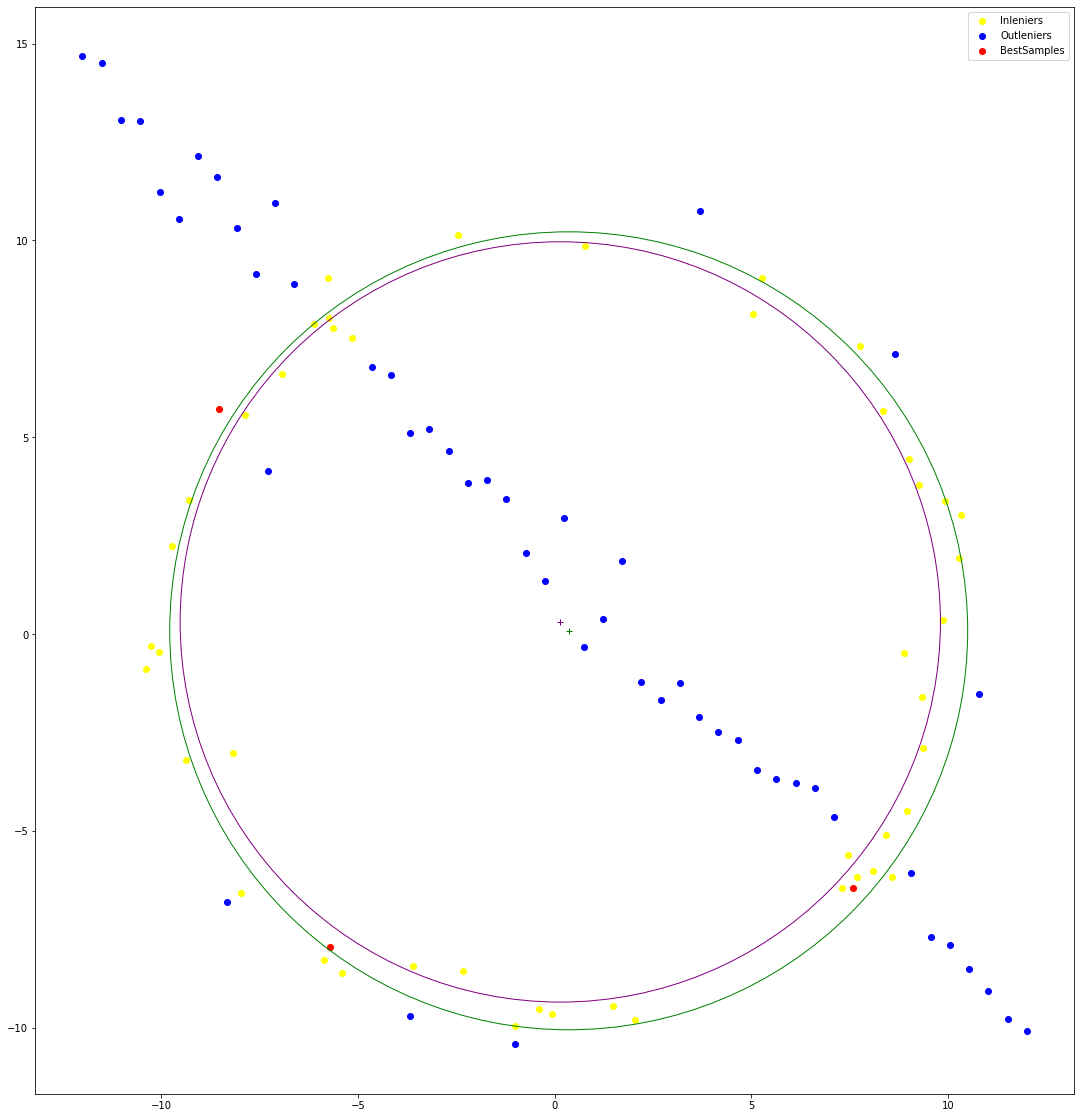

In [9]:
#plotting
figure, axes = plt.subplots( 1, figsize=(20,20) )

ransac_circle = plt.Circle((-G,-F), R, fill=False, color="purple" ,label="RANSAC")
best_fitting_circle = plt.Circle((-best_G,-best_F), best_R, fill=False, color="green" ,label="Best Fitting")

axes.scatter(Inlin[0],Inlin[1], color="yellow" , label="Inleniers")
axes.scatter(Outlin[0],Outlin[1], color="blue" , label="Outleniers")
axes.scatter(bestt_sample[0] ,bestt_sample[1], color="red" , label="BestSamples")
axes.plot(-G,-F,"+",color="purple")
axes.plot(-best_G,-best_F,"+",color="green")
axes.set_aspect( 1 )
axes.add_artist( ransac_circle )
axes.add_artist( best_fitting_circle )
plt.legend(loc ="upper right")
plt.show()

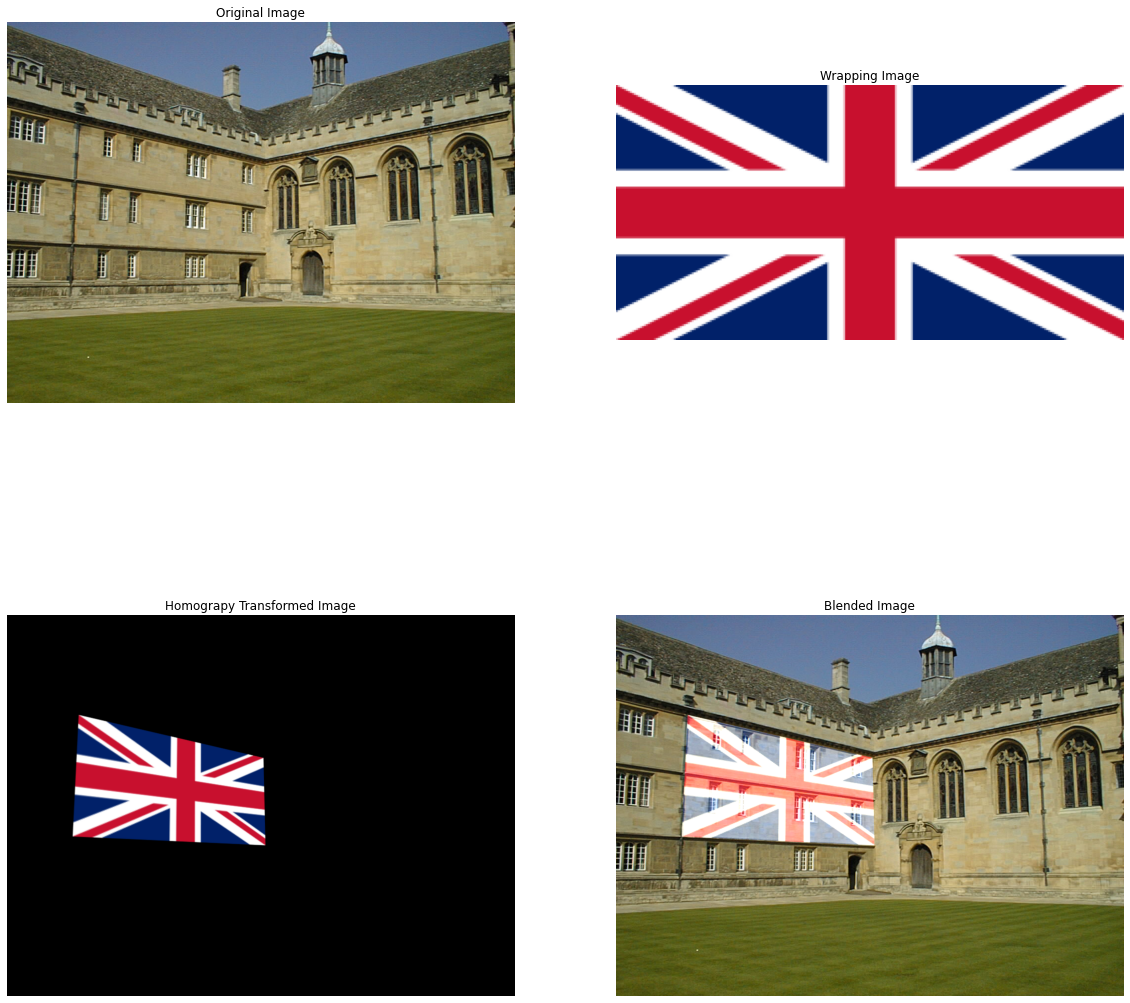

In [10]:
import numpy as np
import cv2 as cv
import matplotlib . pyplot as plt


def MouseHandling(event,x,y,f,pram):
    global im_temp,pts_src
    if event== cv.EVENT_LBUTTONDOWN:
        cv.circle(im_temp ,(x,y),3,(0,255,255),5,cv.LINE_AA)
        cv.imshow("Image",im_temp)
        if len(pts_src)<4:
            pts_src = np.append(pts_src,[(x,y)],axis=0)

architecture_img = cv.imread(r'./Images/Wadham College.jpg')
flag = cv.imread(r'./Images/Flag_of_the_United_Kingdom.svg.png')

height , width = architecture_img.shape[0] , architecture_img.shape[1]
f_width,f_height = flag.shape[1] , flag.shape[0]

pts_dst = np.array([[0,0] , [f_width-1,0] , [f_width-1,f_height-1] , [0,f_height-1] ])

cv.namedWindow("Image",1)

ppp = cv.cvtColor(architecture_img, cv.COLOR_BGR2RGB)
im_temp = cv.cvtColor(ppp, cv.COLOR_RGB2BGR)
pts_src = np.empty((0,2))

cv.setMouseCallback("Image", MouseHandling)

cv.imshow("Image",im_temp)
cv.waitKey(0)

Homograpy_Matrix , status = cv.findHomography(pts_src, pts_dst)

transformed_flag = cv.warpPerspective(flag, np.linalg.inv(Homograpy_Matrix), (width, height))

blend_image = cv.addWeighted(architecture_img, 1, transformed_flag, 0.8, 0)

cv.imshow("Image",blend_image)
cv.waitKey(0)

figure, axes = plt.subplots( 2,2, figsize=(20,20) )
axes[0,0].imshow(cv.cvtColor(architecture_img,cv.COLOR_BGR2RGB))
axes[0,0].set_title("Original Image")
axes[0,0].axis("off")
axes[0,1].imshow(cv.cvtColor(flag,cv.COLOR_BGR2RGB))
axes[0,1].set_title("Wrapping Image")
axes[0,1].axis("off")
axes[1,0].imshow(cv.cvtColor(transformed_flag,cv.COLOR_BGR2RGB))
axes[1,0].set_title("Homograpy Transformed Image")
axes[1,0].axis("off")
axes[1,1].imshow(cv.cvtColor(blend_image,cv.COLOR_BGR2RGB))
axes[1,1].set_title("Blended Image")
axes[1,1].axis("off")

cv.destroyAllWindows()

In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

def MouseHandling(event,x,y,f,pram):
    global im_temp,pts_src
    if event== cv.EVENT_LBUTTONDOWN:
        cv.circle(im_temp ,(x,y),3,(0,255,255),5,cv.LINE_AA)
        cv.imshow("Image",im_temp)
        if len(pts_src)<4:
            pts_src = np.append(pts_src,[(x,y)],axis=0)

def IMG_WRAP(original,wrapping_img):
    global im_temp,pts_src
    height,width=original.shape[0],original.shape[1]
    wrp_height,wrp_width=wrapping_img.shape[0],wrapping_img.shape[1]

    pts_dst=np.array([[0,0],[wrp_width-1,0],[wrp_width-1,wrp_height-1],[0,wrp_height-1]])
    cv.namedWindow("Image",1)

    org_temp=cv.cvtColor(original,cv.COLOR_BGR2RGB)
    im_temp=cv.cvtColor(org_temp,cv.COLOR_RGB2BGR)

    pts_src=np.empty((0,2))

    cv.setMouseCallback("Image",MouseHandling)

    cv.imshow("Image",im_temp)
    cv.waitKey(0)

    Homograpy_Matrix,status=cv.findHomography(pts_src,pts_dst)
    transformed_wrapper=cv.warpPerspective(wrapping_img,np.linalg.inv(Homograpy_Matrix),(width,height))
    blend_image=cv.addWeighted(original,1,transformed_wrapper,0.8,0)

    cv.imshow("Image",blend_image)
    cv.waitKey(0)
    cv.destroyAllWindows()

    return(transformed_wrapper,blend_image)
    

(-0.5, 599.5, 599.5, -0.5)

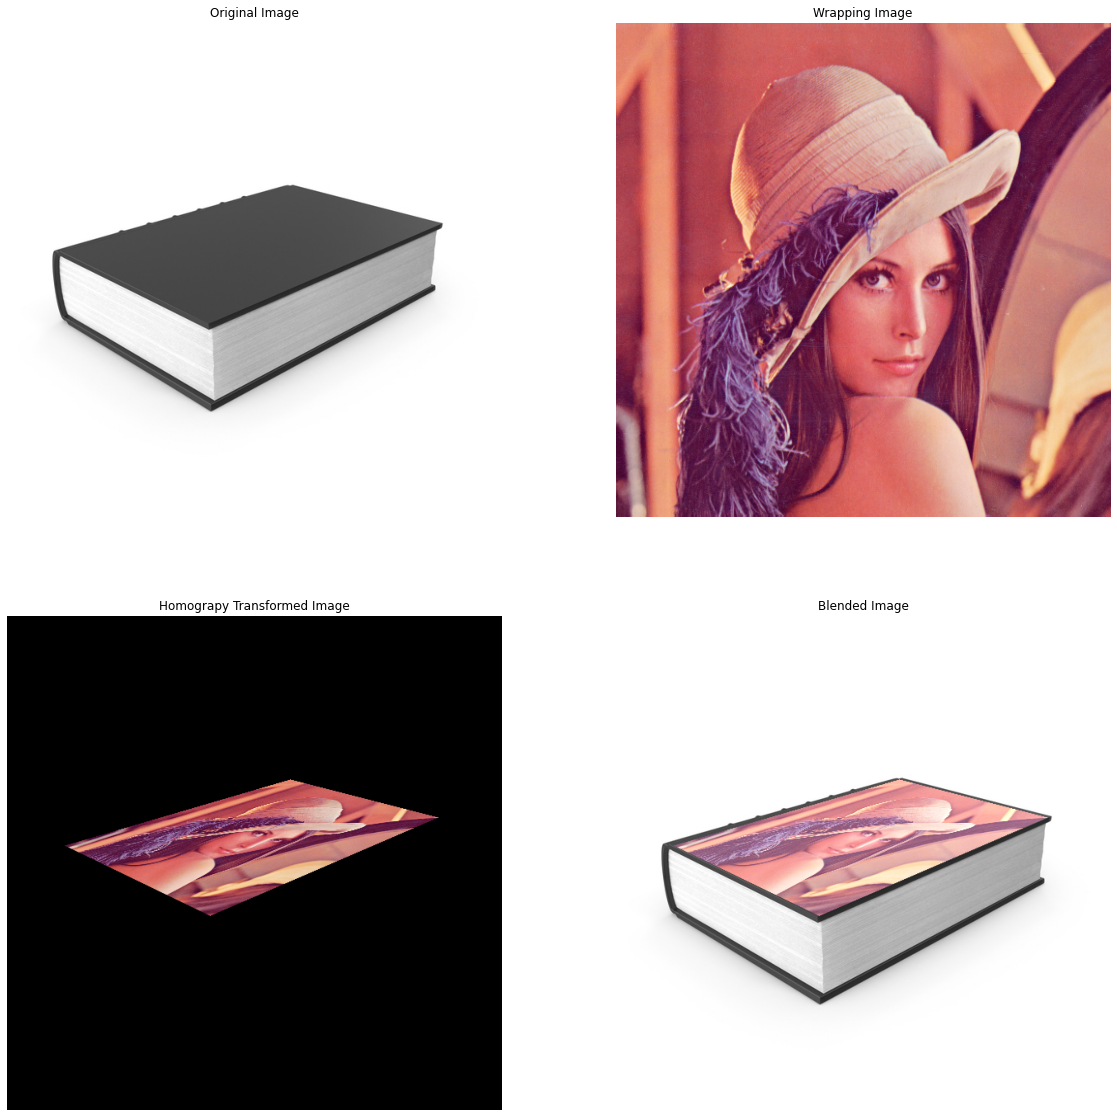

In [4]:
book = cv.imread(r'./Images/book_cover.jpg')
assert book is not None
lenna = cv.imread(r'./Images/Lenna.png')
assert lenna is not None

transformed_lenna,blend_cover=IMG_WRAP(book,lenna)

figure, axes = plt.subplots( 2,2, figsize=(20,20) )
axes[0,0].imshow(cv.cvtColor(book,cv.COLOR_BGR2RGB))
axes[0,0].set_title("Original Image")
axes[0,0].axis("off")
axes[0,1].imshow(cv.cvtColor(lenna,cv.COLOR_BGR2RGB))
axes[0,1].set_title("Wrapping Image")
axes[0,1].axis("off")
axes[1,0].imshow(cv.cvtColor(transformed_lenna,cv.COLOR_BGR2RGB))
axes[1,0].set_title("Homograpy Transformed Image")
axes[1,0].axis("off")
axes[1,1].imshow(cv.cvtColor(blend_cover,cv.COLOR_BGR2RGB))
axes[1,1].set_title("Blended Image")
axes[1,1].axis("off")



(-0.5, 625.5, 408.5, -0.5)

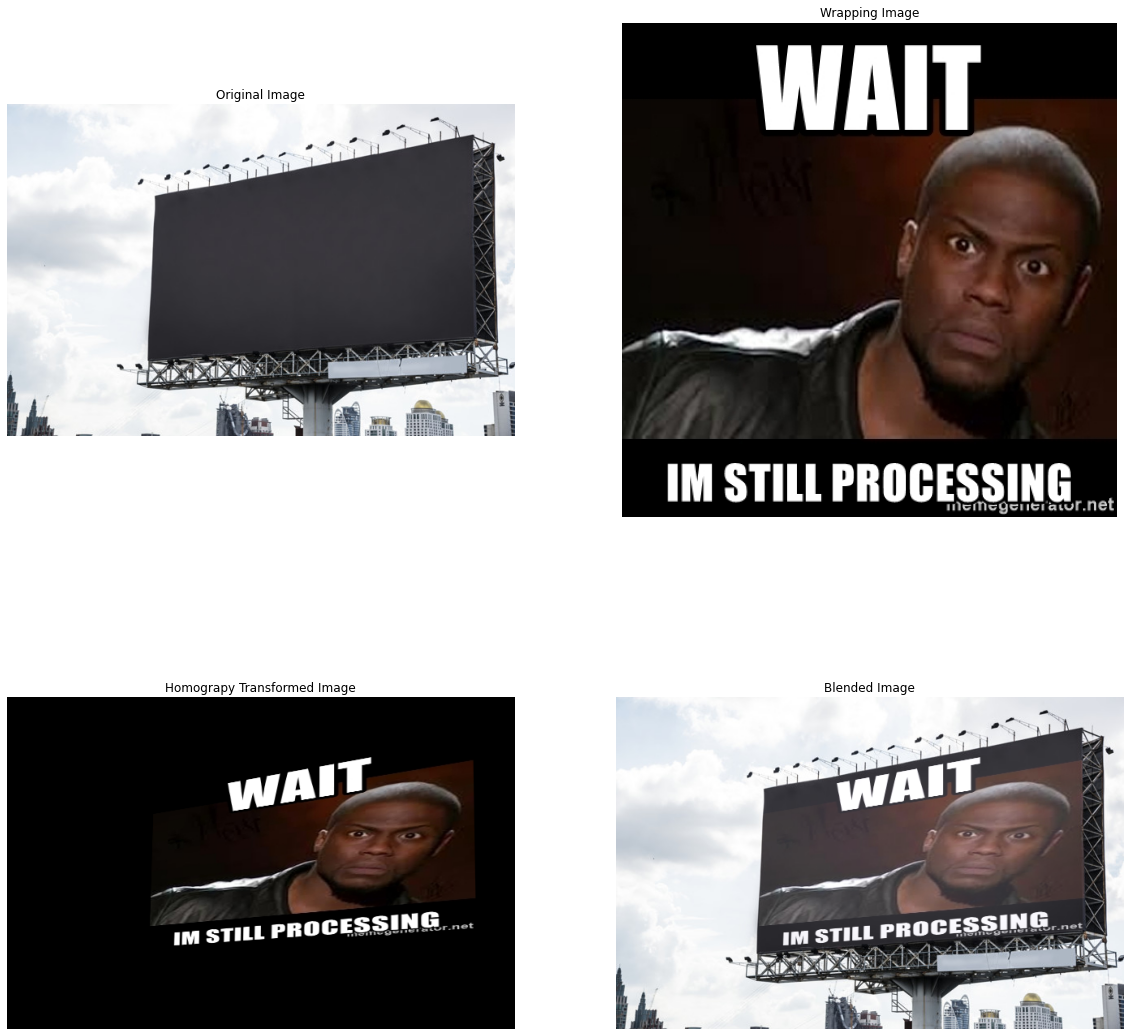

In [7]:
billboard = cv.imread(r'./Images/billboard.jpg')
assert billboard is not None
meme = cv.imread(r'./Images/still_processing.jpg')
assert meme is not None

transformed_lenna,blend_cover=IMG_WRAP(billboard,meme)

figure, axes = plt.subplots( 2,2, figsize=(20,20) )
axes[0,0].imshow(cv.cvtColor(billboard,cv.COLOR_BGR2RGB))
axes[0,0].set_title("Original Image")
axes[0,0].axis("off")
axes[0,1].imshow(cv.cvtColor(meme,cv.COLOR_BGR2RGB))
axes[0,1].set_title("Wrapping Image")
axes[0,1].axis("off")
axes[1,0].imshow(cv.cvtColor(transformed_lenna,cv.COLOR_BGR2RGB))
axes[1,0].set_title("Homograpy Transformed Image")
axes[1,0].axis("off")
axes[1,1].imshow(cv.cvtColor(blend_cover,cv.COLOR_BGR2RGB))
axes[1,1].set_title("Blended Image")
axes[1,1].axis("off")

In [12]:
print(pts_src)
print(Homograpy_Matrix)

[[145. 202.]
 [516. 288.]
 [520. 463.]
 [133. 445.]]
[[ 4.48197529e-01  2.21332113e-02 -6.94595503e+01]
 [-1.15755194e-01  4.99362523e-01 -8.40867265e+01]
 [-7.35285640e-04  1.44277892e-04  1.00000000e+00]]


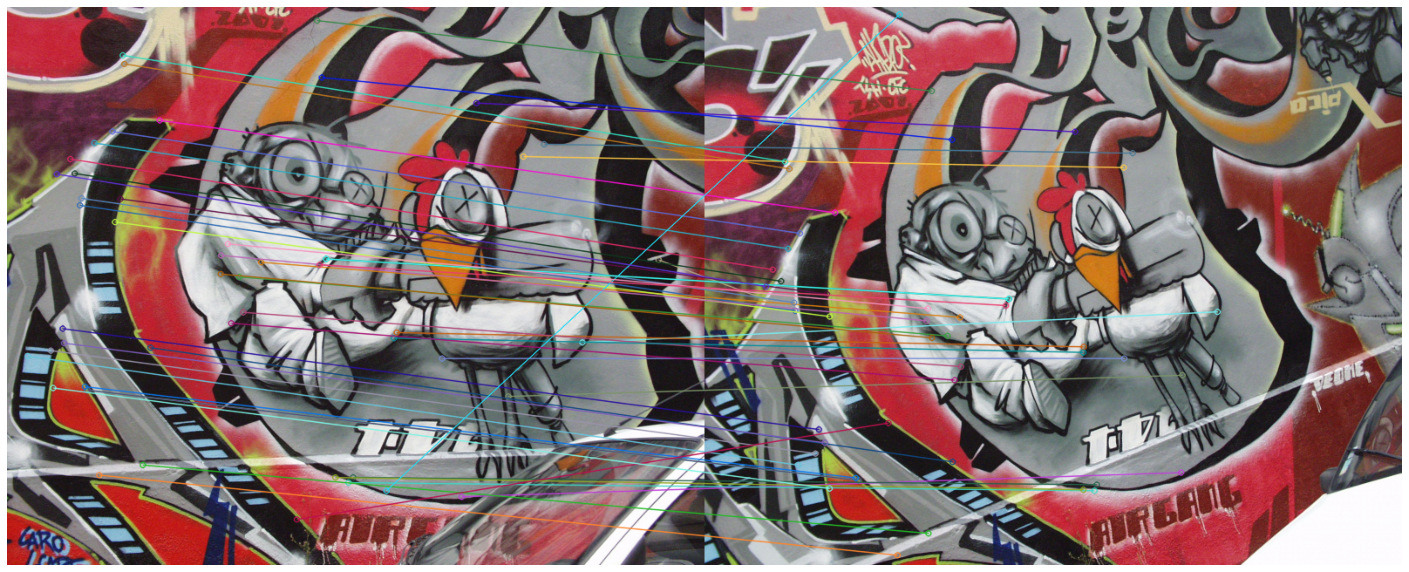

In [19]:
import numpy as np
import cv2 as cv
import matplotlib . pyplot as plt
img1 = cv.imread(r'./Images/grafi/img1.ppm')
assert img1 is not None
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
img2 = cv.imread(r'./Images/grafi/img2.ppm')
assert img2 is not None
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)

sift = cv.SIFT_create()# detect features from the image
keypoints_1, descriptors_1 = sift.detectAndCompute(img1, None) 
keypoints_2, descriptors_2 = sift.detectAndCompute(img2, None) 

# draw the detected key points
bf = cv.BFMatcher(cv.NORM_L1, crossCheck=True)
matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

matched_img = cv.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:50], img2, flags=2)
plt.figure(figsize=(25,18))
plt.imshow(matched_img)
plt.axis('off')
plt.show()

In [26]:
def sift_keypoint(src,dst):
    sift = cv.SIFT_create()# detect features from the image
    keypoints_1, descriptors_1 = sift.detectAndCompute(src, None) 
    keypoints_2, descriptors_2 = sift.detectAndCompute(dst, None) 

    # draw the detected key points
    bf = cv.BFMatcher(cv.NORM_L1, crossCheck=True)
    matches = bf.match(descriptors_1,descriptors_2)
    matches = sorted(matches, key = lambda x:x.distance)

        # Initialize lists
    list_kp1 = []
    list_kp2 = []

    # For each match...
    for mat in matches:

        # Get the matching keypoints for each of the images
        img1_idx = mat.queryIdx
        img2_idx = mat.trainIdx

        # x - columns
        # y - rows
        # Get the coordinates
        (x1, y1) = keypoints_1[img1_idx].pt
        (x2, y2) = keypoints_2[img2_idx].pt

        # Append to each list
        list_kp1.append((int(x1+0.5), int(y1+0.5)))
        list_kp2.append((int(x2+0.5), int(y2+0.5)))
    return(list_kp1,list_kp2)


import random as rnd

def Homography_by_ransac(src,dst):

    N = 20000
    threshold = 0.3
    max_inlinears = 0
    H=[]
    
    src_keylist , dst_keylist = sift_keypoint(src,dst)
    src_keylist, dst_keylist = np.array(src_keylist) , np.array(dst_keylist)
   

    for samp in range(0,N):
        
        ind1  =rnd.randrange(0,len(src_keylist))
        ind2 = rnd.randrange(0,len(src_keylist))
        ind3 = rnd.randrange(0,len(src_keylist))
        ind4 = rnd.randrange(0,len(src_keylist))

        s_pt1 ,d_pt1 = src_keylist[ind1]  , dst_keylist[ind1]
        s_pt2 ,d_pt2 = src_keylist[ind2]  , dst_keylist[ind2]
        s_pt3 ,d_pt3 = src_keylist[ind3]  , dst_keylist[ind3]
        s_pt4 ,d_pt4 = src_keylist[ind4]  , dst_keylist[ind4]

        colinearity =  bool(np.cross(s_pt1,s_pt2)) and bool(np.cross(s_pt1,s_pt3)) and bool(np.cross(s_pt1,s_pt4))
        colinearity =  colinearity and bool(np.cross(s_pt2,s_pt3)) and bool(np.cross(s_pt2,s_pt4))
        colinearity =  colinearity and bool(np.cross(s_pt3,s_pt4))
        if (not colinearity): continue
        

        A = np.array([[ -s_pt1[0], -s_pt1[1], -1, 0, 0, 0, d_pt1[0]*s_pt1[0], d_pt1[0]*s_pt1[1], d_pt1[0]],
                      [ 0, 0, 0, -s_pt1[0], -s_pt1[1], -1, d_pt1[1]*s_pt1[0], d_pt1[1]*s_pt1[1], d_pt1[1]],

                      [ -s_pt2[0], -s_pt2[1], -1, 0, 0, 0, d_pt2[0]*s_pt2[0], d_pt2[0]*s_pt2[1], d_pt2[0]],
                      [ 0, 0, 0, -s_pt2[0], -s_pt2[1], -1, d_pt2[1]*s_pt2[0], d_pt2[1]*s_pt2[1], d_pt2[1]],

                      [ -s_pt3[0], -s_pt3[1], -1, 0, 0, 0, d_pt3[0]*s_pt3[0], d_pt3[0]*s_pt3[1], d_pt3[0]],
                      [ 0, 0, 0, -s_pt3[0], -s_pt3[1], -1, d_pt3[1]*s_pt3[0], d_pt3[1]*s_pt3[1], d_pt3[1]],

                      [ -s_pt4[0], -s_pt4[1], -1, 0, 0, 0, d_pt4[0]*s_pt4[0], d_pt4[0]*s_pt4[1], d_pt4[0]],
                      [ 0, 0, 0, -s_pt4[0], -s_pt4[1], -1, d_pt4[1]*s_pt4[0], d_pt4[1]*s_pt4[1], d_pt4[1]],
                      [0, 0, 0, 0, 0, 0, 0, 0, 1]])
 
         
        h = np.linalg.inv(A) @ np.array([[0,0,0,0,0,0,0,0,1]]).T
        h = np.reshape(h,(3,3))
        X = np.vstack([src_keylist.T , np.ones( (1, len(src_keylist)) )])

        transformed_keys = h @ X
       
        z= np.array([transformed_keys[-1]]).T
        transformed_keys = (transformed_keys[:2].T) / z

        #RANSAC proceedure 
        inlinears_count = 0
        for  i in range(0 , len(transformed_keys)):
            distance = np.sqrt( (transformed_keys[i][0] - dst_keylist[i][0])**2 + (transformed_keys[i][1] - dst_keylist[i][1])**2 )
            #print(distance)
            if abs(distance) < threshold:
                inlinears_count += 1
        
        if inlinears_count > max_inlinears:
            max_inlinears = inlinears_count
            H = h
    #print(max_inlinears)
    return(H)


In [27]:
H=Homography_by_ransac(img1,img2)
print(H)

[[ 8.77892668e-01  3.10413005e-01 -3.85737397e+01]
 [-1.84607155e-01  9.37292441e-01  1.53516005e+02]
 [ 1.95087123e-04 -1.78541982e-05  1.00000000e+00]]


In [28]:
im1to4 = cv.warpPerspective(img2,np.linalg.inv(H),(2000,2000))
cv.namedWindow("Transform",1)
cv.imshow("Transform",im1to4)
cv.waitKey(0)
cv.destroyAllWindows()


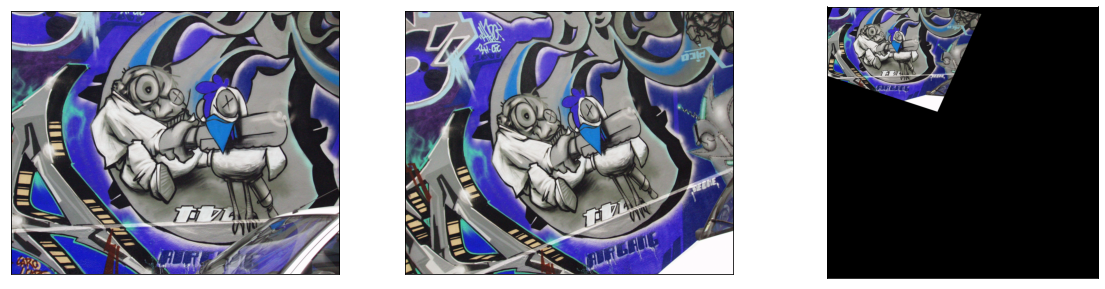

In [29]:
fig, ax = plt.subplots(1,3,figsize =(20,5))
ax[0].imshow(cv.cvtColor(img1, cv.COLOR_BGR2RGB))
ax[0].set_xticks([]), ax[0].set_yticks([])
ax[1].imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))
ax[1].set_xticks([]), ax[1].set_yticks([])
ax[2].imshow(cv.cvtColor(im1to4, cv.COLOR_BGR2RGB))
ax[2].set_xticks([]), ax[2].set_yticks([])
plt.show()

In [30]:
H1=[]
with open(r'.\Images\grafi\H1to2p') as f:
    H1=np.array([[float(h) for h in line.split()] for line in f])
im1to4 = cv.warpPerspective(img2,np.linalg.inv(H1),(2000,2000))
cv.namedWindow("Transform",1)
cv.imshow("Transform",im1to4)
cv.waitKey(0)
cv.destroyAllWindows()